In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read cleaned data
file_path = Path("Resources/cleaned_data.csv")
df_heart_health = pd.read_csv(file_path)

In [3]:
# Display sample data
print(df_heart_health.head())

   sex  age  education  smokingStatus  cigsPerDay  BPMeds  prevalentStroke  \
0  1.0   39          4            0.0           0       0                0   
1  0.0   46          2            0.0           0       0                0   
2  1.0   48          1            1.0          20       0                0   
3  0.0   61          3            1.0          30       0                0   
4  0.0   46          3            1.0          23       0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  CHDRisk  \
0             0         0      195  26.97         80       77        0   
1             0         0      250  28.73         95       76        0   
2             0         0      245  25.34         75       70        0   
3             1         0      225  28.58         65      103        1   
4             0         0      285  23.10         85       85        0   

          MAP  
0   82.000000  
1   94.333333  
2   95.833333  
3  113.333333  
4   99

In [4]:
# Define features (X) and target (y)
X = df_heart_health.drop(columns=['CHDRisk'])
y = df_heart_health['CHDRisk']

In [5]:

import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(df_heart_health.drop('CHDRisk', axis=1), df_heart_health['CHDRisk'])
y_resampled.value_counts()
y = y_resampled
X = X_resampled

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [10]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[607  19]
 [  6 602]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       626
           1       0.97      0.99      0.98       608

    accuracy                           0.98      1234
   macro avg       0.98      0.98      0.98      1234
weighted avg       0.98      0.98      0.98      1234


Accuracy Score:
0.979740680713128


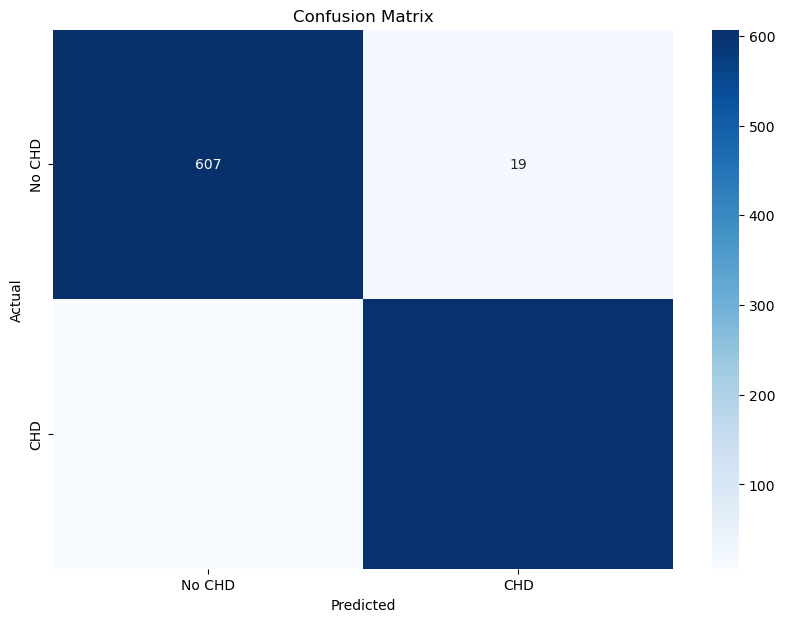

In [11]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

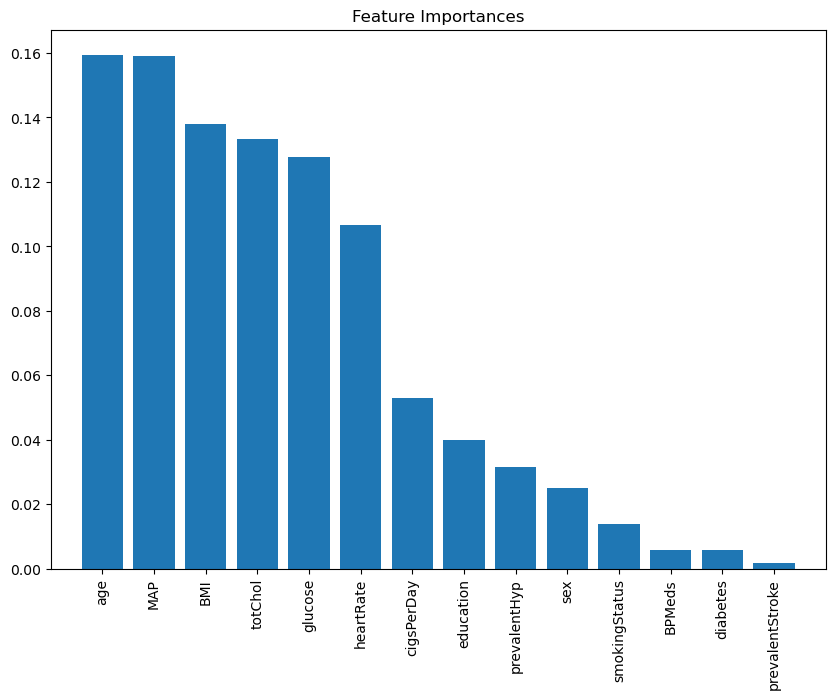

In [13]:
# Plot feature importances
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
import joblib

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']